# Analysis of Large Body Text of Tolstoy’s War and Peace

# Step 1 & 2

Extracted body of text into the following nested format:

Book number and year

-> Chapter index (within a given book)

-> Paragraph index (within a given chapter)

-> Sentence index (within a given paragraph)

-> Sentence text

-> Word index (within a given sentence)

-> Word (w/o special characters) (only alphanumeric values)

In [19]:
# coding: utf-8

import re
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk import sent_tokenize,word_tokenize
import random
import matplotlib
import colorsys
import string
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from random import randint


nltk.download('punkt')


# Labels the bars in bar plot
def autolabel(rects,texts):
    for i,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, texts[i],
                ha='center', va='bottom')

# Removes punctuations in a word
def test_trans(s):
    remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
    return s.translate(remove_punctuation_map)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Implementation

1. Used NLTK functions Sentence Tokenize and Word Tokenize to extract the words related to a paragraph

2. Removed the punctuation which are treated as the new words by the Word tokenize function

3. Converted the each word to lower case to make the words case insensitive

4. Created a nested dictionary with chapter, paragraph, sentence, word

In [18]:

# Extracts the text from the book and forms a nested structure using dictionary

f = open(r'2600-0.txt',encoding="utf8")
text = f.read()
l = [m.start() for m in re.finditer('BOOK ONE: 1805', text)]

index_text = text[l[0]:l[1]]

book_chap = {}

splt2 = index_text.split('\n\n\n    ')
for i in range(len(splt2)):
    splt3 = splt2[i].split('\n\n   ')
    book_chap[splt3[0]] = []
    book_chap[splt3[0]] += splt3[1:]

book_to_text = {}
body_list = text[l[1]:].split('\n\n\n\n\n\n')[:-1]
current_book = None
database = []
book_count = -1
para_count = 0
sentence_count = 0
word_count =0
chapter_index = 0
nested_dict = {}
max_chapter_index = 0
total_quoted_text = 0
total_unquoted_text = 0
word_dic = {}
for l in body_list:
    max_chapter_index=max(max_chapter_index,chapter_index)
    if l in book_chap.keys():
        current_book = l
        nested_dict[current_book] = {}
        book_count += 1
        chapter_index = 0
    else:
        paras = l.split('\n\n')[1:]
        for i,para in enumerate(paras):
            para_index = i
            nested_dict[current_book][chapter_index][para_index] = {}
            try:
                sentences = sent_tokenize(para)
            except:
                print("debug")
            quote_flag_start = False
            quote_flag_end = False
            word_count = 0
            indirect_count = 0
            for sentence_index,sent in enumerate(sentences):
                nested_dict[current_book][chapter_index][para_index][sentence_index] = {}
                words = word_tokenize(sent)
                for word_index,word in enumerate(words):
                    nested_dict[current_book][chapter_index][para_index][sentence_index][word_index] = word
                    if not quote_flag_start and len(word) and word[0] == u'“':
                         quote_flag_start=True
                    elif quote_flag_start:
                        if not word[0] == u'”':
                            if len(test_trans(word)):
                                total_quoted_text+=1
                                nested_dict[current_book][chapter_index][para_index][sentence_index][
                                        word_index] = test_trans(word)
                                if not test_trans(word) in word_dic:
                                    word_dic[test_trans(word)] = 0
                                word_dic[test_trans(word)] += 1
                        else:
                            quote_flag_start=False
                    else:
                        if len(test_trans(word)):
                            total_unquoted_text+=1
                            nested_dict[current_book][chapter_index][para_index][sentence_index][word_index] = test_trans(word)
                            if not test_trans(word) in word_dic:
                                word_dic[test_trans(word)] = 0
                            word_dic[test_trans(word)] += 1
                    print("book_index : "+ str(book_count+1) + " , chapter index :" + str(chapter_index + 1) \
                               + " , paragraph index :" + str(para_index+1) + " , sentence index :" + str(sentence_index + 1) \
                               + " , word index :" + str(word_index + 1))
    chapter_index += 1
    nested_dict[current_book][chapter_index] = {}

FileNotFoundError: [Errno 2] No such file or directory: '2600-0.txt'

In [12]:
import json
with open('result.json', 'w') as fp:
    json.dump(nested_dict, fp)

In [13]:
print("Total Number of Quoted Texts\n",total_quoted_text)
print("Total Number of UnQuoted Texts\n",total_unquoted_text)
print("\nQuoted Text to Unquoted Text ratio",total_quoted_text/float(total_unquoted_text))

Total Number of Quoted Texts
 130440
Total Number of UnQuoted Texts
 445393

Quoted Text to Unquoted Text ratio 0.292864952974115


# Step:3 B

Illustrate, with a simple and comprehensible visualization, the lengths of all books and chapters in one graph.

Find/point out interesting features or outliers in the text structure


In [14]:
results = {}
results_plot = {}
for book,chapter in nested_dict.items():
    book_count = 0
    chapter_count = 0
    results[book] = {}
    for chapter,paragraph in chapter.items():
        for paragraph,sentence in paragraph.items():
            for sentence,word in sentence.items():
                chapter_count+=len(word.keys())
        book_count+=chapter_count
        results[book][chapter] = chapter_count
        if not chapter in results_plot:
             results_plot[chapter] = []
        results_plot[chapter].append(chapter_count)
        chapter_count = 0
    results[book]["book_count"]=book_count

## Visualization of Book and Chapter count using Stacked Bar plot.

Current size: [12.0, 9.0]


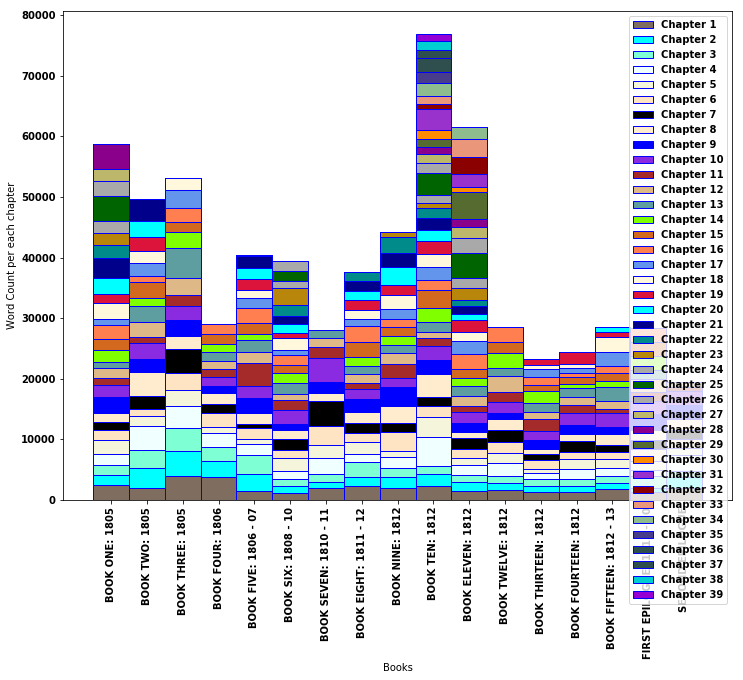

In [15]:

results_plot = {}
for book, chapter in nested_dict.items():
    for i in range(1, max_chapter_index):
        if not i in results_plot:
            results_plot[i] = []
        if i in results[book]:
            results_plot[i].append(results[book][i])
        else:
            results_plot[i].append(0)
    rc('font', weight='bold')

    
    
fig_size = plt.rcParams["figure.figsize"]
print("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

r = range(17)
names = nested_dict.keys()
barWidth = 1
plt.bar(r, results_plot[1], color='#7f6d5f', edgecolor='blue', width=barWidth)
colors=[]
for name, hex in matplotlib.colors.cnames.items():
     colors.append(name)
total_count_so_far = results_plot[1]
for i in range(2,max_chapter_index):
    bar_new = results_plot[i]
    plt.bar(r, bar_new, bottom=total_count_so_far, color=colors[i],label=colors[i], edgecolor='blue', width=barWidth)
    total_count_so_far= list(np.array(bar_new)+np.array(total_count_so_far))
plt.xticks(r, names,rotation=90)
plt.xlabel("Books")
plt.ylabel("Word Count per each chapter")
plt.legend(["Chapter "+str(i) for i in range(1,40)])
plt.show()

### Each bar represents a different and different colors in the bar corresponds to the respective chapter counts

# Step 3C
Perform a word frequency analysis, returning a table of word occurrences and provide a visualization (not a word cloud)

Current size: [12.0, 9.0]


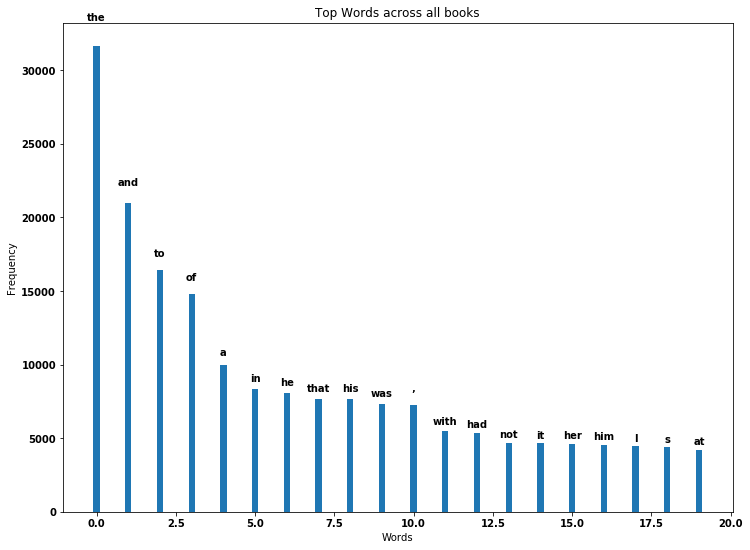

In [16]:
from collections import Counter
top_elements = Counter(word_dic).most_common(100)

words = []
df = pd
word_count = []
for key in top_elements[:20]:
    words.append(key[0])
    word_count.append(key[1])
rects1 = plt.bar(range(len(word_count)), word_count,  width=0.2)
autolabel(rects1, words)


fig_size = plt.rcParams["figure.figsize"]
print("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel("Words")
plt.title("Top Words across all books")
plt.ylabel("Frequency")
plt.show()

##                         Visualisation of top 20 most frequent words

In [17]:
df = pd.DataFrame(top_elements, columns=['Word', 'Word Frequency'])
display(df)

,Word,Word Frequency
0,the,31635
1,and,20989
2,to,16394
3,of,14813
4,a,9994
5,in,8336
6,he,8072
7,that,7686
8,his,7659
9,was,7309
